In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [30]:
def calcMotorSpeed_PID_DegErrIn(degError, kp, CCW_ANGLE_DIRECTION = 1, integralError = 0, derivativeError = 0):
    
    # Process Input
    
    # Constant Parameters: 
    kp = kp #proportional constant
    ki = 0 #integralError constant
    kd = 0 #derivativeError constant
    ANGLE_OF_GOING_RIGHT = -90; #angle (deg) the robot detects when moving right. Set to -90 if up is 0, CCW is positive.
    DEFAULT_SPEED = 255 #the regular speed the robot runs at
    MAX_SPEED = 255 #exactly 255
    MIN_SPEED = -255;
    CCW_ANGLE_DIRECTION = 1; #set to 1 if CCW is negative
    ######

    # Same code as before
    leftSpeed = DEFAULT_SPEED
    rightSpeed = DEFAULT_SPEED
    
    #Positive error means need to move CCW
    error = degError
    error = CCW_ANGLE_DIRECTION * error;
    OutputIntegralError = integralError + error;

    
    u = kp * error + ki * integralError + kd * derivativeError
    
    leftSpeed = max(MIN_SPEED, min(MAX_SPEED, leftSpeed - u)) 
    rightSpeed = max(MIN_SPEED, min(MAX_SPEED, rightSpeed + u))
    motorSpeedTuple = (leftSpeed, rightSpeed, OutputIntegralError)
    return min(motorSpeedTuple[0], motorSpeedTuple[1]) #return a tuple, of the new motor speeds

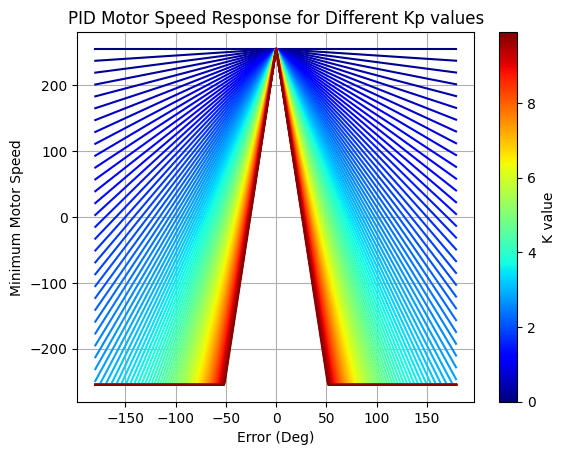

In [50]:
err = np.arange(-180, 180, 1)
K = np.arange(0, 10, 0.1)  # Logarithmic spacing for K values
motorSpeeds = np.empty((len(K), len(err)))

fig, ax = plt.subplots()  # Create figure and axes
plt.figure(1)
for idx, k in enumerate(K):
    for i, e in enumerate(err):
        motorSpeeds[idx, i] = calcMotorSpeed_PID_DegErrIn(e, k)
    plt.plot(err, motorSpeeds[idx], color=cm.jet(idx / len(K)), label=f'K = {k:.2f}')

# Add a color bar for reference
sm = plt.cm.ScalarMappable(cmap=cm.jet, norm=plt.Normalize(vmin=min(K), vmax=max(K)))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, label='K value')

plt.xlabel('Error (Deg)')
plt.ylabel('Minimum Motor Speed')
plt.title('PID Motor Speed Response for Different Kp values')
#plt.legend()
plt.grid(True)
plt.show()

In [51]:
err = np.arange(-180, 180, 1)
K = np.logspace(-1, 2, 100)  # Logarithmic spacing for K values
motorSpeeds = np.empty((len(K), len(err)))

for idx, k in enumerate(K):
    for i, e in enumerate(err):
        motorSpeeds[idx, i] = calcMotorSpeed_PID_DegErrIn(e, k)

# Find the smallest value of k for which motor speed ever reaches -255
min_k = None
for idx, k in enumerate(K):
    if np.min(motorSpeeds[idx]) <= -255:
        min_k = k
        break

if min_k is not None:
    print("Smallest value of k for which minimum motor speed reaches or exceeds -255:", min_k)
else:
    print("No value of k found for which motor speed reaches or exceeds -255.")

Smallest value of k for which minimum motor speed reaches or exceeds -255: 2.848035868435802
